In [47]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as mpimg
%matplotlib inline

import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

import os
import shutil
import time
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import linear_model
from subprocess import check_output

In [48]:
import seaborn as sns
sns.set(font_scale = 2)
from sklearn.model_selection import train_test_split
import math,os,random
import scipy.stats as stat
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [49]:
iris = pd.read_csv('/content/Iris.csv') # iris dataset

iris_feat = iris.iloc[:,:-1]

iris_species = iris.iloc[:,-1]

In [50]:
iris_feat


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


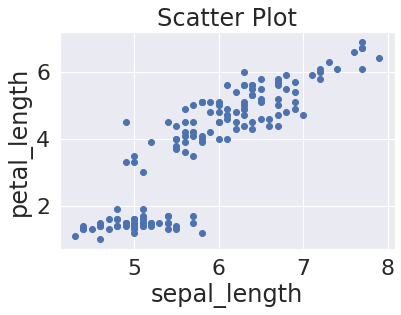

In [51]:
plt.scatter(iris_feat['SepalLengthCm'],iris_feat['PetalLengthCm'],alpha=1)  # alpha chances the transparency

#Adding the aesthetics
plt.title('Scatter Plot')

plt.xlabel('sepal_length')

plt.ylabel('petal_length')

#Show the plot
plt.show()

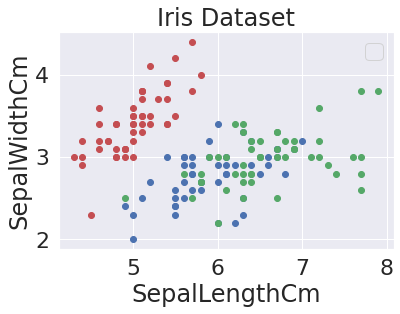

In [52]:
colors = {'Iris-setosa':'r', 'Iris-virginica':'g', 'Iris-versicolor':'b'}

# create a figure and axis
fig, ax = plt.subplots()

# plot each data-point

for i in range(len(iris_feat['SepalLengthCm'])):

    ax.scatter(iris_feat['SepalLengthCm'][i], iris_feat['SepalWidthCm'][i],color=colors[iris_species[i]])

# set a title and labels
ax.set_title('Iris Dataset')
ax.set_xlabel('SepalLengthCm')

ax.set_ylabel('SepalWidthCm')
ax.legend()

plt.show()

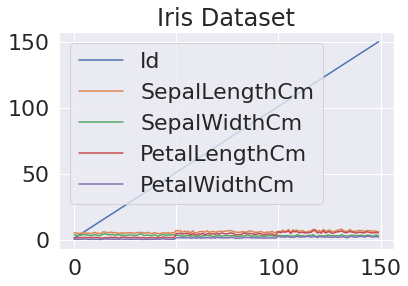

In [53]:
# get columns to plot
columns = iris_feat.columns

# create x data
x_data = range(0, iris.shape[0])

# create figure and axis
fig, ax = plt.subplots()

# plot each column
for column in columns:
    ax.plot(x_data, iris[column], label=column)

# set title and legend
ax.set_title('Iris Dataset')

ax.legend()

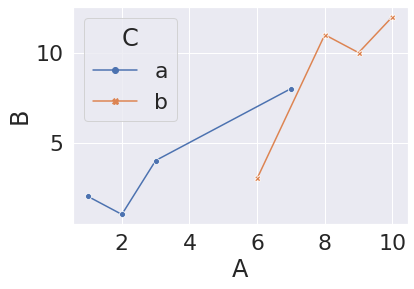

In [54]:
# Seaborn Implementation
df = pd.DataFrame({
    'A': [1,3,2,7,9,6,8,10],
    'B': [2,4,1,8,10,3,11,12],
    'C': ['a','a','a','a','b','b','b','b']
})

sns.lineplot(
    data=df,
    x="A", y="B", hue="C",style="C",
    markers=True, dashes=False
)

Text(0, 0.5, 'Frequency')

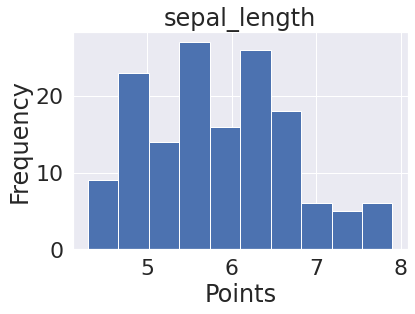

In [55]:
fig, ax = plt.subplots()

# plot histogram
ax.hist(iris_feat['SepalLengthCm'])

# set title and labels
ax.set_title('sepal_length')

ax.set_xlabel('Points')

ax.set_ylabel('Frequency')


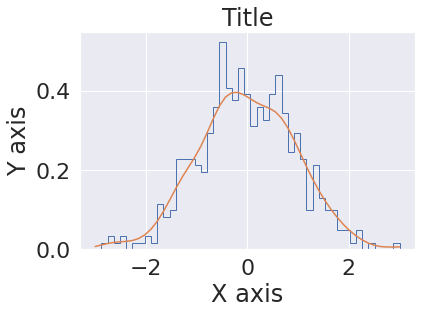

In [56]:
#Creating the dataset
test_data = np.random.normal(0, 1, (500, ))
density = stat.gaussian_kde(test_data)

#Creating the line histogram
n, x, _ = plt.hist(test_data, bins=np.linspace(-3, 3, 50), histtype=u'step', density=True)  
plt.plot(x, density(x))

#Adding the aesthetics
plt.title('Title')

plt.xlabel('X axis')

plt.ylabel('Y axis') 

#Show the plot
plt.show()

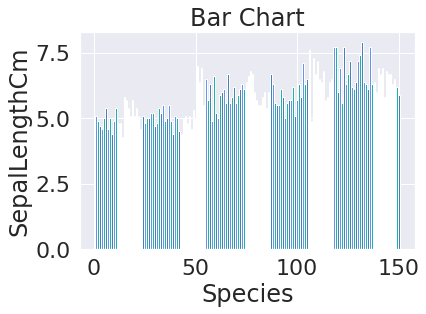

In [57]:
df = iris.groupby('Id')['SepalLengthCm'].sum().to_frame().reset_index()

#Creating the bar chart 
plt.bar(df['Id'],df['SepalLengthCm'],color = ['cornflowerblue','lightseagreen','steelblue']) 

#Adding the aesthetics
plt.title('Bar Chart')

plt.xlabel('Species')

plt.ylabel('SepalLengthCm') 

#Show the plot
plt.show()

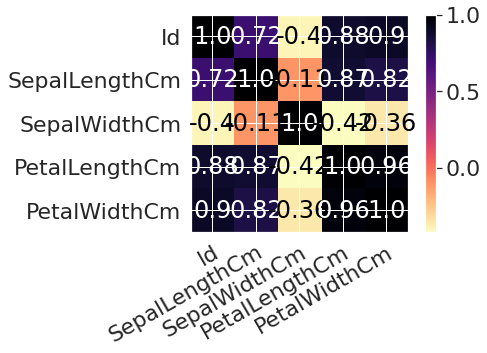

In [58]:
corr = iris.corr()

fig, ax = plt.subplots()

img = ax.imshow(corr.values,cmap = "magma_r")


# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))

ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

cbar = ax.figure.colorbar(img, ax=ax ,cmap='')
plt.setp(ax.get_xticklabels(), rotation=30, ha="right",
         rotation_mode="anchor")

# text annotations.

for i in range(len(corr.columns)):

    for j in range(len(corr.columns)):

        if corr.iloc[i, j]<0:

            text = ax.text(j, i, np.around(corr.iloc[i, j], decimals=2),
                       ha="center", va="center", color="black")
        else:

            text = ax.text(j, i, np.around(corr.iloc[i, j], decimals=2),
                       ha="center", va="center", color="white")

In [59]:
def Entropy(target_col):
    elements,counts = np.unique(target_col,return_counts = True)  # i have used unique function to get unique elements and their counts
    
    entropy=0
    
    for i in range(len(elements)):
    
        entropy += (-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts))
    
    return entropy
    

In [60]:
def Gain_ratio(info_gain,data,best_feature):

    ratio =  info_gain/split_info(data,best_feature)

    return ratio

In [61]:
def gain(data,s_feature,target_feature):       

        n_entropy = 0

        vals,counts= np.unique(data[s_feature],return_counts=True)

        for i in range(len(vals)):

            k=Entropy(data.where(data[s_feature]==vals[i]).dropna()[target_feature])

            n_entropy += (counts[i]/np.sum(counts))*k

        return n_entropy

In [62]:
def Infogain(df,s_feature,y):

    total_entropy = Entropy(df[y])
  
    Information_Gain = total_entropy - gain(df,s_feature,y)
    
    return Information_Gain
    

In [63]:
def split_info(data,f):

    elements,counts = np.unique(data[f],return_counts = True)

    entropy=0

    for i in range(len(elements)):

        entropy += (-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts))

    return entropy

In [64]:
def Gain_ratio(info_gain,data,best_feature):

    ratio =  info_gain/split_info(data,best_feature)

    return ratio

In [65]:
'''   DT(data,originaldata,features,target_feature="z",parent = None):
      
      where (data)          = contains all the data includes target and we will work on this 
            (orignal data)  = it stays the same as orignal data
            (featrues)      = list of all features
            (target_feature)= it contains the name of target
            (parent)        = it will act as a parent node
'''

def DT(data,originaldata,features,target_feature="target",parent = None,level=0): 
    
 
    if (len(np.unique(data[target_feature])) <= 1):   # checking if all the values are same if yes then we reached at a leaf
        
        elements,counts = np.unique(data[target_feature],return_counts = True)

        print('Level ',level)

        if elements ==0 :

            print('Count of 0 =',np.sum(counts))

        elif elements ==1 :

            print('Count of 1 =',np.sum(counts))

        elif elements ==2 :

            print('Count of 2 =',np.sum(counts))

        print('Current Entropy is =',Entropy(data[target_feature]))

        print('Reached Leaf Node ')

        print()

        return np.unique(data[target_feature])[0]



    elif len(data) == 0:                              # checking the data is empty or not


        return np.unique(orignaldata[target_feature])
    
    elif len(features) == 0 :
        
        return parent
    
    else :

        P_node = np.unique(data[target_feature])      # put all the uniqe values of target in parent node
        
        values = []

        for ftr in features :                         # loop over all the features

            v = Infogain(data,ftr,target_feature)     # getting list of information gain of all features

            values.append(v)
        
        best_feature_index = np.argmax(values)        # taking out the index of the feture which contains max information gain

        best_feature = features[best_feature_index]
        
        tree = {best_feature:{}}                      # i have used dictionaris to show my actual tree
        
        tot_entropy = Entropy(data[target_feature])   # calculated entropy at current node
       
        
        rat=Gain_ratio(max(values),data,best_feature) # calculated gain ratio  of the features on which we split up on
        
        elements,counts = np.unique(data[target_feature],return_counts = True)

        print('Level ',level)                                      #these all are printing task

        for i in range(len(elements)):

            if elements[i]==0 :

                print('count of 0  =',counts[i])

            elif elements[i]==1 :

                print('count of 1  =',counts[i])

            elif elements[i]==2 :

                print('count of 2  =',counts[i])
      
        print('Current entropy is   = ',tot_entropy)  

        print('Splitting on feature ',best_feature,' with gain ratio ', rat)
        
        print()
        
        
        new_features = features                     # ---> from here to  

        features=[]

        for i in new_features :                     
                                                   #  (process to remove the feature from feature list after split
            if i != best_feature :                  

                features.append(i)

        level += 1       

        new_features=None                          # ---> to here
        
        for vals in np.unique(data[best_feature]):   #   recursion of all diffrent values in that splitting feature
            
            value = vals

            sub_data = (data[data[best_feature] == value]).dropna()
            
            subtree = DT(sub_data,data,features,target_feature,P_node,level)

            tree[best_feature][value] = subtree
            
        return tree  
     

In [66]:
# its all given to us , i have just added one more column of target

from sklearn import datasets

import pandas as pd

iris = datasets.load_iris()

df = pd.DataFrame(iris.data)

df.columns = ["sl", "sw", 'pl', 'pw']

y = pd.DataFrame(iris.target)

y.columns = ['target']


def label(val, *boundaries):

    if (val < boundaries[0]):

        return 'a'

    elif (val < boundaries[1]):

        return 'b'

    elif (val < boundaries[2]):

        return 'c'

    else:

        return 'd'

#Function to convert a continuous data into labelled data
#There are 4 lables  - a, b, c, d

def toLabel(df, old_feature_name):

    second = df[old_feature_name].mean()

    minimum = df[old_feature_name].min()

    first = (minimum + second)/2

    maximum = df[old_feature_name].max()

    third = (maximum + second)/2

    return df[old_feature_name].apply(label, args= (first, second, third))

#Convert all columns to labelled data
df['sl_labeled'] = toLabel(df, 'sl')

df['sw_labeled'] = toLabel(df, 'sw')

df['pl_labeled'] = toLabel(df, 'pl')

df['pw_labeled'] = toLabel(df, 'pw')

df.head()

df.drop(['sl', 'sw', 'pl', 'pw'], axis = 1, inplace = True)    

df['target']=y                                                    # here i added the target column  in the data

print(df.columns[:-1])                                            # this gives me the list of all features except target one

#Index(['sl_labeled', 'sw_labeled', 'pl_labeled', 'pw_labeled'], dtype='object')

import numpy as np

Index(['sl_labeled', 'sw_labeled', 'pl_labeled', 'pw_labeled'], dtype='object')


In [67]:
tree=DT(df, df, df.columns[:-1])     # printing steps

print()

Level  0
count of 0  = 50
count of 1  = 50
count of 2  = 50
Current entropy is   =  1.584962500721156
Splitting on feature  pw_labeled  with gain ratio  0.6996382036222091

Level  1
Count of 0 = 50
Current Entropy is = 0.0
Reached Leaf Node 

Level  1
Count of 1 = 10
Current Entropy is = 0.0
Reached Leaf Node 

Level  1
count of 1  = 40
count of 2  = 16
Current entropy is   =  0.863120568566631
Splitting on feature  pl_labeled  with gain ratio  0.4334099495621067

Level  2
Count of 1 = 1
Current Entropy is = 0.0
Reached Leaf Node 

Level  2
count of 1  = 39
count of 2  = 8
Current entropy is   =  0.6581912658132185
Splitting on feature  sl_labeled  with gain ratio  0.12674503775809332

Level  3
Count of 2 = 1
Current Entropy is = 0.0
Reached Leaf Node 

Level  3
Count of 1 = 14
Current Entropy is = 0.0
Reached Leaf Node 

Level  3
count of 1  = 23
count of 2  = 7
Current entropy is   =  0.783776947484701
Splitting on feature  sw_labeled  with gain ratio  0.07092036405148876

Level  4
C

In [68]:
import pprint  

pprint.pprint(tree)         # printing actual tree (type 1)

{'pw_labeled': {'a': 0,
                'b': 1,
                'c': {'pl_labeled': {'b': 1,
                                     'c': {'sl_labeled': {'a': 2,
                                                          'b': 1,
                                                          'c': {'sw_labeled': {'a': array([1, 2]),
                                                                               'b': array([1, 2]),
                                                                               'c': 1}},
                                                          'd': 1}},
                                     'd': 2}},
                'd': 2}}


In [69]:
def formatData(t,s):
    if not isinstance(t,dict) and not isinstance(t,list):
        print ("\t"*s+str(t))
    else:
        for key in t:
            print ("\t"*s+str(key))
            if not isinstance(t,list):
                formatData(t[key],s+1)

formatData(tree,0)         

pw_labeled
	a
		0
	b
		1
	c
		pl_labeled
			b
				1
			c
				sl_labeled
					a
						2
					b
						1
					c
						sw_labeled
							a
								[1 2]
							b
								[1 2]
							c
								1
					d
						1
			d
				2
	d
		2
